## Imports 

In [ ]:
# pip install yfinanceastype

In [1]:
import yfinance as yf
import pandas as pd
import os

### Download price history

In [2]:
sp500=yf.Ticker("^GSPC")

In [3]:
sp500=sp500.history(period="max")

In [5]:
sp500

Open         High          Low        Close  \
Date                                                                            
1927-12-30 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
1928-01-03 00:00:00-05:00    17.760000    17.760000    17.760000    17.760000   
1928-01-04 00:00:00-05:00    17.719999    17.719999    17.719999    17.719999   
1928-01-05 00:00:00-05:00    17.549999    17.549999    17.549999    17.549999   
1928-01-06 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
...                                ...          ...          ...          ...   
2023-05-22 00:00:00-04:00  4190.779785  4209.220215  4179.680176  4192.629883   
2023-05-23 00:00:00-04:00  4176.799805  4185.680176  4142.540039  4145.580078   
2023-05-24 00:00:00-04:00  4132.959961  4132.959961  4103.979980  4115.240234   
2023-05-25 00:00:00-04:00  4155.709961  4165.740234  4129.729980  4151.279785   
2023-05-26 00:00:00-04:00  4156.160156  4212.870117  4156.160156  4205.450195   

                               Volume  
Date                                   
1927-12-30 00:00:00-05:00           0  
1928-01-03 00:00:00-05:00           0  
1928-01-04 00:00:00-05:00           0  
1928-01-05 00:00:00-05:00           0  
1928-01-06 00:00:00-05:00           0  
...                               ...  
2023-05-22 00:00:00-04:00  3728520000  
2023-05-23 00:00:00-04:00  4155320000  
2023-05-24 00:00:00-04:00           0  
2023-05-25 00:00:00-04:00  4147760000  
2023-05-26 00:00:00-04:00  3715460000  

[23966 rows x 5 columns]

In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-05-15 00:00:00-04:00', '2023-05-16 00:00:00-04:00',
               '2023-05-17 00:00:00-04:00', '2023-05-18 00:00:00-04:00',
               '2023-05-19 00:00:00-04:00', '2023-05-22 00:00:00-04:00',
               '2023-05-23 00:00:00-04:00', '2023-05-24 00:00:00-04:00',
               '2023-05-25 00:00:00-04:00', '2023-05-26 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23966, freq=None)

## Cleaning the data

<AxesSubplot:xlabel='Date'>

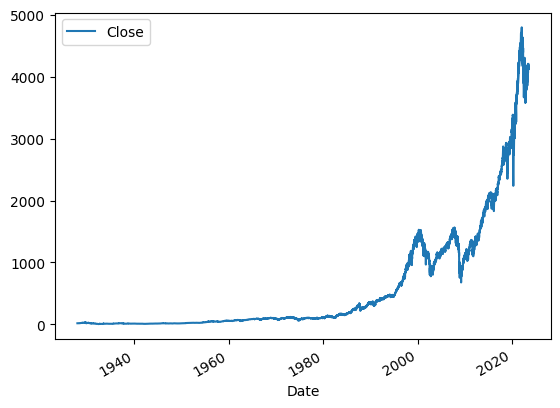

In [9]:
sp500.plot.line(y="Close", use_index=True)

In [4]:
del sp500['Dividends']
del sp500['Stock Splits']

## Target : To predict if the stock will go up or down 

In [7]:
# tommorow's price 
sp500["Tommorow"]=sp500["Close"].shift(-1)

In [8]:
sp500

Open         High          Low        Close  \
Date                                                                            
1927-12-30 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
1928-01-03 00:00:00-05:00    17.760000    17.760000    17.760000    17.760000   
1928-01-04 00:00:00-05:00    17.719999    17.719999    17.719999    17.719999   
1928-01-05 00:00:00-05:00    17.549999    17.549999    17.549999    17.549999   
1928-01-06 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
...                                ...          ...          ...          ...   
2023-05-22 00:00:00-04:00  4190.779785  4209.220215  4179.680176  4192.629883   
2023-05-23 00:00:00-04:00  4176.799805  4185.680176  4142.540039  4145.580078   
2023-05-24 00:00:00-04:00  4132.959961  4132.959961  4103.979980  4115.240234   
2023-05-25 00:00:00-04:00  4155.709961  4165.740234  4129.729980  4151.279785   
2023-05-26 00:00:00-04:00  4156.160156  4212.870117  4156.160156  4205.450195   

                               Volume     Tommorow  
Date                                                
1927-12-30 00:00:00-05:00           0    17.760000  
1928-01-03 00:00:00-05:00           0    17.719999  
1928-01-04 00:00:00-05:00           0    17.549999  
1928-01-05 00:00:00-05:00           0    17.660000  
1928-01-06 00:00:00-05:00           0    17.500000  
...                               ...          ...  
2023-05-22 00:00:00-04:00  3728520000  4145.580078  
2023-05-23 00:00:00-04:00  4155320000  4115.240234  
2023-05-24 00:00:00-04:00           0  4151.279785  
2023-05-25 00:00:00-04:00  4147760000  4205.450195  
2023-05-26 00:00:00-04:00  3715460000          NaN  

[23966 rows x 6 columns]

In [12]:
# Target is a boolean after check 
sp500["Target"]=(sp500["Tommorow"]>sp500["Close"]).astype(int)

In [13]:
sp500

Open         High          Low        Close  \
Date                                                                            
1927-12-30 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
1928-01-03 00:00:00-05:00    17.760000    17.760000    17.760000    17.760000   
1928-01-04 00:00:00-05:00    17.719999    17.719999    17.719999    17.719999   
1928-01-05 00:00:00-05:00    17.549999    17.549999    17.549999    17.549999   
1928-01-06 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000   
...                                ...          ...          ...          ...   
2023-05-22 00:00:00-04:00  4190.779785  4209.220215  4179.680176  4192.629883   
2023-05-23 00:00:00-04:00  4176.799805  4185.680176  4142.540039  4145.580078   
2023-05-24 00:00:00-04:00  4132.959961  4132.959961  4103.979980  4115.240234   
2023-05-25 00:00:00-04:00  4155.709961  4165.740234  4129.729980  4151.279785   
2023-05-26 00:00:00-04:00  4156.160156  4212.870117  4156.160156  4205.450195   

                               Volume     Tommorow  Target  
Date                                                        
1927-12-30 00:00:00-05:00           0    17.760000       1  
1928-01-03 00:00:00-05:00           0    17.719999       0  
1928-01-04 00:00:00-05:00           0    17.549999       0  
1928-01-05 00:00:00-05:00           0    17.660000       1  
1928-01-06 00:00:00-05:00           0    17.500000       0  
...                               ...          ...     ...  
2023-05-22 00:00:00-04:00  3728520000  4145.580078       0  
2023-05-23 00:00:00-04:00  4155320000  4115.240234       0  
2023-05-24 00:00:00-04:00           0  4151.279785       1  
2023-05-25 00:00:00-04:00  4147760000  4205.450195       1  
2023-05-26 00:00:00-04:00  3715460000          NaN       0  

[23966 rows x 7 columns]

In [14]:
# using data after my bday 
sp500=sp500.loc["2002-01-01":].copy()

In [15]:
sp500

Open         High          Low        Close  \
Date                                                                            
2002-01-02 00:00:00-05:00  1148.079956  1154.670044  1136.229980  1154.670044   
2002-01-03 00:00:00-05:00  1154.670044  1165.270020  1154.010010  1165.270020   
2002-01-04 00:00:00-05:00  1165.270020  1176.550049  1163.420044  1172.510010   
2002-01-07 00:00:00-05:00  1172.510010  1176.969971  1163.550049  1164.890015   
2002-01-08 00:00:00-05:00  1164.890015  1167.599976  1157.459961  1160.709961   
...                                ...          ...          ...          ...   
2023-05-22 00:00:00-04:00  4190.779785  4209.220215  4179.680176  4192.629883   
2023-05-23 00:00:00-04:00  4176.799805  4185.680176  4142.540039  4145.580078   
2023-05-24 00:00:00-04:00  4132.959961  4132.959961  4103.979980  4115.240234   
2023-05-25 00:00:00-04:00  4155.709961  4165.740234  4129.729980  4151.279785   
2023-05-26 00:00:00-04:00  4156.160156  4212.870117  4156.160156  4205.450195   

                               Volume     Tommorow  Target  
Date                                                        
2002-01-02 00:00:00-05:00  1171000000  1165.270020       1  
2002-01-03 00:00:00-05:00  1398900000  1172.510010       1  
2002-01-04 00:00:00-05:00  1513000000  1164.890015       0  
2002-01-07 00:00:00-05:00  1308300000  1160.709961       0  
2002-01-08 00:00:00-05:00  1258800000  1155.140015       0  
...                               ...          ...     ...  
2023-05-22 00:00:00-04:00  3728520000  4145.580078       0  
2023-05-23 00:00:00-04:00  4155320000  4115.240234       0  
2023-05-24 00:00:00-04:00           0  4151.279785       1  
2023-05-25 00:00:00-04:00  4147760000  4205.450195       1  
2023-05-26 00:00:00-04:00  3715460000          NaN       0  

[5388 rows x 7 columns]

## Training the a model w randomforest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)

In [18]:
train=sp500.iloc[:-100]
test=sp500.iloc[-100:]

In [19]:
# keep the use of future data to a min 
predictors=["Close","Volume","Open","High","Low"]

In [20]:
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

measure the model accuracy

In [22]:
from sklearn.metrics import precision_score

In [37]:
preds=model.predict(test[predictors])

In [38]:
preds

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [39]:
preds=pd.Series(preds,index=test.index)

In [40]:
preds

Date
2023-01-04 00:00:00-05:00    0
2023-01-05 00:00:00-05:00    1
2023-01-06 00:00:00-05:00    0
2023-01-09 00:00:00-05:00    0
2023-01-10 00:00:00-05:00    0
                            ..
2023-05-22 00:00:00-04:00    0
2023-05-23 00:00:00-04:00    0
2023-05-24 00:00:00-04:00    0
2023-05-25 00:00:00-04:00    0
2023-05-26 00:00:00-04:00    0
Length: 100, dtype: int32

In [41]:
precision_score(test["Target"],preds)

0.4444444444444444

👆 0.44 :  !_! bc iske against lagao better hoga...0.56 ka precision .........but lets fix that shit...

In [42]:
# plot
combined=pd.concat([test["Target"],preds],axis=1)

<AxesSubplot:xlabel='Date'>

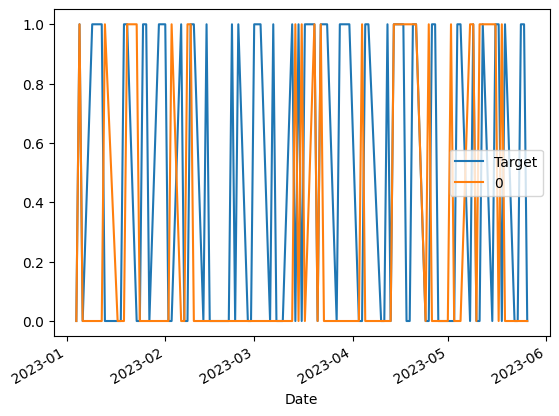

In [43]:
combined.plot()
# horrible.....

## Adding a Backtesting system

In [45]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train["Target"])
    preds=model.predict(test[predictors])
    preds=pd.Series(preds,index=test.index,name="Predictions")
    combined=pd.concat([test["Target"],preds],axis=1)
    return combined

In [46]:
def backtest(data,model,predictors,start=2500,step=250):
    all_predictions=[]
    for i in range(start,data.shape[0],step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy()
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [47]:
predictions=backtest(sp500,model,predictors)

In [48]:
predictions["Predictions"].value_counts()

0    1532
1    1356
Name: Predictions, dtype: int64

In [50]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5184365781710915

barely good enough at 51 ....but okay... better than before 

In [52]:
predictions["Target"].value_counts()/predictions.shape[0]

1    0.539127
0    0.460873
Name: Target, dtype: float64

## Adding more predictiors to the model

In [55]:
# 2 days , 5 d, 2months, ....
horizons=[2,5,60,250,1000]
new_predictors=[]

In [56]:
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [57]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [58]:
sp500

Open         High          Low        Close  \
Date                                                                            
2005-12-20 00:00:00-05:00  1259.920044  1263.859985  1257.209961  1259.619995   
2005-12-21 00:00:00-05:00  1259.619995  1269.369995  1259.619995  1262.790039   
2005-12-22 00:00:00-05:00  1262.790039  1268.189941  1262.500000  1268.119995   
2005-12-23 00:00:00-05:00  1268.119995  1269.760010  1265.920044  1268.660034   
2005-12-27 00:00:00-05:00  1268.660034  1271.829956  1256.540039  1256.540039   
...                                ...          ...          ...          ...   
2023-05-19 00:00:00-04:00  4204.149902  4212.910156  4180.200195  4191.979980   
2023-05-22 00:00:00-04:00  4190.779785  4209.220215  4179.680176  4192.629883   
2023-05-23 00:00:00-04:00  4176.799805  4185.680176  4142.540039  4145.580078   
2023-05-24 00:00:00-04:00  4132.959961  4132.959961  4103.979980  4115.240234   
2023-05-25 00:00:00-04:00  4155.709961  4165.740234  4129.729980  4151.279785   

                               Volume     Tommorow  Target  Close_Ratio_2  \
Date                                                                        
2005-12-20 00:00:00-05:00  1996690000  1262.790039       1       0.999881   
2005-12-21 00:00:00-05:00  2065170000  1268.119995       1       1.001257   
2005-12-22 00:00:00-05:00  1888500000  1268.660034       1       1.002106   
2005-12-23 00:00:00-05:00  1285810000  1256.540039       0       1.000213   
2005-12-27 00:00:00-05:00  1540470000  1258.170044       1       0.995200   
...                               ...          ...     ...            ...   
2023-05-19 00:00:00-04:00  4041900000  4192.629883       1       0.999277   
2023-05-22 00:00:00-04:00  3728520000  4145.580078       0       1.000078   
2023-05-23 00:00:00-04:00  4155320000  4115.240234       0       0.994357   
2023-05-24 00:00:00-04:00           0  4151.279785       1       0.996327   
2023-05-25 00:00:00-04:00  4147760000  4205.450195       1       1.004360   

                           Trend_2  Close_Ratio_5  Trend_5  Close_Ratio_60  \
Date                                                                         
2005-12-20 00:00:00-05:00      0.0       0.994876      1.0        1.026982   
2005-12-21 00:00:00-05:00      1.0       0.998950      1.0        1.028908   
2005-12-22 00:00:00-05:00      2.0       1.003614      2.0        1.032532   
2005-12-23 00:00:00-05:00      2.0       1.003828      3.0        1.032398   
2005-12-27 00:00:00-05:00      1.0       0.994770      3.0        1.022150   
...                            ...            ...      ...             ...   
2023-05-19 00:00:00-04:00      1.0       1.007931      3.0        1.032815   
2023-05-22 00:00:00-04:00      1.0       1.005363      3.0        1.032032   
2023-05-23 00:00:00-04:00      1.0       0.992382      3.0        1.019767   
2023-05-24 00:00:00-04:00      0.0       0.987177      2.0        1.011702   
2023-05-25 00:00:00-04:00      1.0       0.998062      2.0        1.019727   

                           Trend_60  Close_Ratio_250  Trend_250  \
Date                                                              
2005-12-20 00:00:00-05:00      34.0         1.044592      139.0   
2005-12-21 00:00:00-05:00      34.0         1.047020      140.0   
2005-12-22 00:00:00-05:00      34.0         1.051249      140.0   
2005-12-23 00:00:00-05:00      34.0         1.051504      141.0   
2005-12-27 00:00:00-05:00      33.0         1.041310      140.0   
...                             ...              ...        ...   
2023-05-19 00:00:00-04:00      31.0         1.056586      115.0   
2023-05-22 00:00:00-04:00      32.0         1.056517      115.0   
2023-05-23 00:00:00-04:00      31.0         1.044446      115.0   
2023-05-24 00:00:00-04:00      31.0         1.036659      114.0   
2023-05-25 00:00:00-04:00      32.0         1.045639      114.0   

                           Close_Ratio_1000  Trend_1000  
Date                             

## Improving the model

In [59]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [60]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [61]:
predictions = backtest(sp500, model, new_predictors)

In [62]:
predictions["Predictions"].value_counts()

0.0    1553
1.0     334
Name: Predictions, dtype: int64

In [63]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5718562874251497

Its better than before ....57

In [64]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.537891
0    0.462109
Name: Target, dtype: float64

In [65]:
predictions

Target  Predictions
Date                                          
2015-11-25 00:00:00-05:00       1          0.0
2015-11-27 00:00:00-05:00       0          0.0
2015-11-30 00:00:00-05:00       1          0.0
2015-12-01 00:00:00-05:00       0          0.0
2015-12-02 00:00:00-05:00       0          0.0
...                           ...          ...
2023-05-19 00:00:00-04:00       1          0.0
2023-05-22 00:00:00-04:00       0          0.0
2023-05-23 00:00:00-04:00       0          0.0
2023-05-24 00:00:00-04:00       1          1.0
2023-05-25 00:00:00-04:00       1          0.0

[1887 rows x 2 columns]

## more todo
add more than data of market indeces that opens before the us market opens  
add news - macro eco factors  
add sectors  
get hourly data (not easy to get)